# MNIST Dataset-2: Impact of Standardization and Normalization

In this note, we still model neural networks for recognition of handwritten digits using **mnist** data, but fetch the datasets directly from Keras, rather than one from Yan LeCun's web. 

The raw data from Keras is neither standardized nor normalized, i.e. the numbers in each pixel can be 0-255 (The numbers in each pixel from Yan LeCun's web are 0-1, which has been rescaled). We found that in this case the learning rate of stochastic gradient descent is sensitive to the model accuracy. Sometimes using large rate ($\alpha =0.1$) will result in poor performance, so we have to be careful to select a smaller value of $\alpha$, such as $\alpha =0.01$ for numerical optimization.

However, with **considering standardization/normalization**, the learning parameters and network structure are **less** sensitive. Roughly speaking, the learning processes using the preprocessed data are more efficient and accurate tha using the raw data. In the following, we will demonstrate the difference.

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

In [3]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

## 0. The Raw MNIST database from Keras

In this version, we fetch the **mnist** data from Keras:

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Each MNIST image is represented by 28 pixels by 28 pixels:

Note the raw data format is a two-dimensional array of 28 pixels by 28 pixels. To input Keras, we need to reshape to a one-dimensional array of 784: 

In [5]:
X_train.shape, y_train.shape, type(X_train)

((60000, 28, 28), (60000,), numpy.ndarray)

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Reshape the MNIST data in 784-dimensional vector space with integers [0,255]:

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [8]:
X_train.shape, X_test.shape, type(X_train)

((60000, 784), (10000, 784), numpy.ndarray)

In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [11]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### The images:

In [12]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

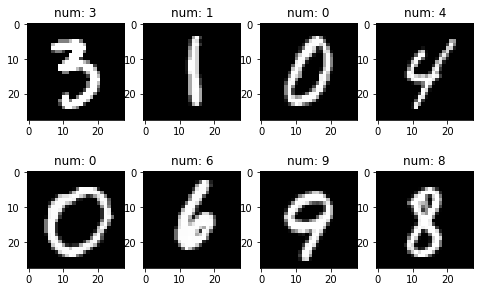

In [13]:
plotExamples(X_train, y_train)

## 1. Preprocessing

### (a) Standardization

This standardization process is to standardize the data along the same features.

In [14]:
from sklearn import preprocessing

In [29]:
scalar = preprocessing.StandardScaler().fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [30]:
X_train_std[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -4.41807799e-03,  -5.75481961e-03,  -4.08251693e-03,
        -4.08251693e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -4.08251693e-03,
        -4.70968827e-03,  -8.79934640e-03,  -1.15905591e-02,
        -1.47589798e-02,  -1.92848546e-02,  -2.46717975e-02,
        -2.90710271e-02,  -3.05926583e-02,  -3.11640127e-02,
        -3.19628719e-02,  -3.02025355e-02,  -3.13102175e-02,
        -2.83833960e-02,  -2.31191906e-02,  -1.91666260e-02,
        -1.67723008e-02,

### The images:

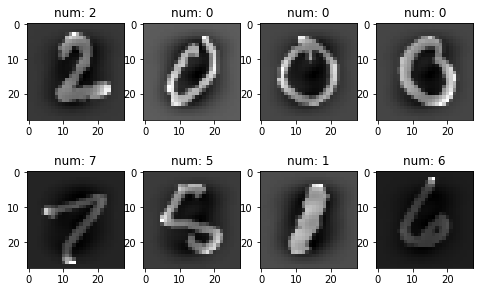

In [31]:
plotExamples(X_train_std, y_train)

### (b) Normalization

This normalization is to normalize the data along the same sample (**axis =1**).

In [23]:
X_train_nor = preprocessing.normalize(X_train, norm='l2', axis=1)
X_test_nor = preprocessing.normalize(X_test, norm='l2', axis=1)

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [24]:
np.array(X_train_nor[0])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

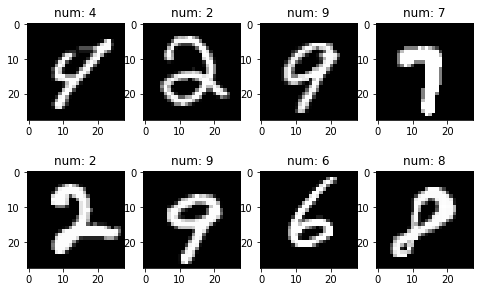

In [25]:
plotExamples(X_train_nor, y_train)

## 2. Training Neural Networks

Here we just benchmark several neural network models and compare the model performance. All results show using **standardized** or **normalized** mnist data is more efficient than the raw data, and here we will show how significant the model performance improves using the preprocessing data.

### (a) single-hidden layer with 100 neurons, "sigmoid" activation fucntion


#### Raw data, mse loss, $\alpha$ = 0.1

In [26]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, nb_epoch=50, verbose=0)
scores = model.evaluate(X_test, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

10000/10000 [==============================] - 0s     
 test set, loss:  0.00800592859923  , acc: 0.9563


#### Standardized data, mse loss, $\alpha =0.1$

In [32]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train_std, y_train, batch_size=32, nb_epoch=50, verbose=0)
scores = model.evaluate(X_test_std, y_test);
print(' test, loss: ', scores[0], ' , acc:', scores[1])

 9824/10000 [============================>.] - ETA: 0s test, loss:  0.0102657492755  , acc: 0.9402


#### Raw data, categorical_crosssentropy loss, $\alpha =0.1$ (poor performace)

In [33]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, nb_epoch=50, verbose=0)
scores = model.evaluate(X_test, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

 9888/10000 [============================>.] - ETA: 0s test set, loss:  0.439626646817  , acc: 0.8667


#### Raw data, "categorical_crosssentrop" loss, $\alpha =0.01$ (improve)

In [34]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.01) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, nb_epoch=50, verbose=0)
scores = model.evaluate(X_test, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

 9856/10000 [============================>.] - ETA: 0s  Loss:  0.15917128969  , acc: 0.9519


#### Standardized data, "categorical_crosssentropy" loss, $\alpha =0.1$

In [35]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train_std, y_train, batch_size=32, nb_epoch=50, verbose=0)
scores = model.evaluate(X_test_std, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

 9920/10000 [============================>.] - ETA: 0s test set, loss:  0.119297841781  , acc: 0.9679


#### Normalized data, "categorical_crosssentropy" loss, $\alpha =0.1$

In [36]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train_nor, y_train, batch_size=32, nb_epoch=50, verbose=0)
scores = model.evaluate(X_test_nor, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

 9952/10000 [============================>.] - ETA: 0s test set, loss:  0.253789396632  , acc: 0.9264


For the single-hidden-layer neural networks, we obviously see that using **standardized** or **normalized** data is more efficient than using raw data and is even able to provide extraordinarily accurate results.

### (b) 3-hidden-layer neural network, "relu" activation function

#### Raw data, "categorical_crossentropy" loss, $\alpha=0.1$

In [38]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.1) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train, y_train, batch_size=16, nb_epoch=20, verbose=0)
scores = model2.evaluate(X_test, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

 9888/10000 [============================>.] - ETA: 0s  Loss:  14.5481926758  , acc: 0.0974


#### Raw data, "categorical_crossentropy" loss, $\alpha=0.01$

In [39]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.01) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train, y_train, batch_size=16, nb_epoch=20, verbose=0)
scores = model2.evaluate(X_test, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

10000/10000 [==============================] - 0s     
  Loss:  14.4547077744  , acc: 0.1032


#### Standardized data, "categorical_crossentropy" loss, $\alpha=0.1$

In [40]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.1) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train_std, y_train, batch_size=16, nb_epoch=50, verbose=0)
scores = model2.evaluate(X_test_std, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

10000/10000 [==============================] - 0s     
  Loss:  2.30139242477  , acc: 0.1135


#### Standardized data, "categorical_crossentropy" loss, $\alpha=0.01$

In [41]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.01) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train_std, y_train, batch_size=16, nb_epoch=40, verbose=0)
scores = model2.evaluate(X_test_std, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

 9984/10000 [============================>.] - ETA: 0s test set, loss:  0.151077634725  , acc: 0.9749


#### Normalized data, "categorical_crossentropy" loss, $\alpha=0.01$

In [42]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.01) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train_nor, y_train, batch_size=16, nb_epoch=40, verbose=0)
scores = model2.evaluate(X_test_nor, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

 9984/10000 [============================>.] - ETA: 0s test set, loss:  0.0802744085685  , acc: 0.9754


## 3. Prediction

**model.predict(X)** gives the probability of each class, and **model.predict_classes(X)** directly gives the class. The highest probability identifies the class which the image is.

In [43]:
predictions = model2.predict_classes(X_test_std)
print (predictions[:8])

10000/10000 [==============================] - 1s     
[7 2 1 0 4 1 4 9]


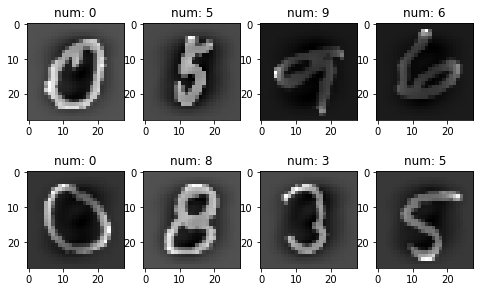

In [44]:
plotExamples(X_test_std, y_test)

## Summary

### Before training models, preprocessed (standardized/normalized) data makes learning process more efficient and provides more accurate results.